Lab2 Part1 R Vignette
------------------------------------------------------------------------------------------------------------------------------------

Creating a database file using dplyr

In [1]:
library("RSQLite")
library(dplyr)
my_db <- src_sqlite("my_db.sqlite3", create = T) #src_sqlite/my_sql gives the database source file path and create command creates it
my_db


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



src:  sqlite 3.11.1 [my_db.sqlite3]
tbls: flights, sqlite_stat1

To copy the contents from a database's table to a variable using 'copy_to' function

In [5]:
library(nycflights13)
flights_sqlite <- copy_to(my_db, flights, temporary = FALSE, indexes = list(
  c("year", "month", "day"), "carrier"))
class(flights_sqlite)

ERROR: Error: Table flights already exists.


In [ ]:
install.packages("nycflights13")

In [4]:
flights_sqlite
class(flights_sqlite)

ERROR: Error in eval(expr, envir, enclos): object 'flights_sqlite' not found


To cache data in local SQLite database

In [7]:
flights_sqlite <- tbl(nycflights13_sqlite(), "flights")

Caching nycflights db at /tmp/RtmpiJnFrS/nycflights13.sqlite
Creating table: airlines
Creating table: airports
Creating table: flights
Creating table: planes
Creating table: weather


In [8]:
flights_sqlite

Source:   query [?? x 19]
Database: sqlite 3.11.1 [/tmp/RtmpiJnFrS/nycflights13.sqlite]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            6

Selecting table's contents in a variable

In [9]:
flights_sqlite <- tbl(my_db, sql("SELECT * FROM flights"))

In [10]:
select(flights_sqlite, year:day, dep_delay, arr_delay) #Performing 'SELECT' query for particular columns from a table variable

Source:   query [?? x 5]
Database: sqlite 3.11.1 [my_db.sqlite3]

    year month   day dep_delay arr_delay
   <int> <int> <int>     <dbl>     <dbl>
1   2013     1     1         2        11
2   2013     1     1         4        20
3   2013     1     1         2        33
4   2013     1     1        -1       -18
5   2013     1     1        -6       -25
6   2013     1     1        -4        12
7   2013     1     1        -5        19
8   2013     1     1        -3       -14
9   2013     1     1        -3        -8
10  2013     1     1        -2         8
# ... with more rows

Select query variation1

In [11]:
select(flights, year:day) #Select all columns between year and day (inclusive)

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


Select query variation2

In [12]:
# Select all columns except those from year to day (inclusive)
select(flights, -(year:day))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


Filtering records for a 'Where' clause using dplyr

In [13]:
filter(flights_sqlite, dep_delay > 240)

Source:   query [?? x 19]
Database: sqlite 3.11.1 [my_db.sqlite3]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      848           1835       853     1001           1950
2   2013     1     1     1815           1325       290     2120           1542
3   2013     1     1     1842           1422       260     1958           1535
4   2013     1     1     2115           1700       255     2330           1920
5   2013     1     1     2205           1720       285       46           2040
6   2013     1     1     2343           1724       379      314           1938
7   2013     1     2     1332            904       268     1616           1128
8   2013     1     2     1412            838       334     1710           1147
9   2013     1     2     1607           1030       337     2003           1355
10  2013     1     2     2131           1512       379     2340 

Performing 'Order by' in SQL table using dplyr

In [14]:
arrange(flights_sqlite, year, month, day) # Used to perform an 'Order by' expression in SQL. Here the data frame flights_sqlite is arranged by three columns. Year, Month and Day 

Source:   query [?? x 19]
Database: sqlite 3.11.1 [my_db.sqlite3]

    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1   2013     1     1      517            515         2      830            819
2   2013     1     1      533            529         4      850            830
3   2013     1     1      542            540         2      923            850
4   2013     1     1      544            545        -1     1004           1022
5   2013     1     1      554            600        -6      812            837
6   2013     1     1      554            558        -4      740            728
7   2013     1     1      555            600        -5      913            854
8   2013     1     1      557            600        -3      709            723
9   2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753 

Ordering records in descending order using desc() function

In [15]:
arrange(flights, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00
2013,12,5,756,1700,896,1058,2020,878,AA,172,N5DMAA,EWR,MIA,149,1085,17,0,2013-12-05 17:00:00
2013,5,3,1133,2055,878,1250,2215,875,MQ,3744,N523MQ,EWR,ORD,112,719,20,55,2013-05-03 20:00:00


Selecting particular set of rows using slice() function

In [16]:
slice(flights, 1:10)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


Changing column values using rename() function

In [17]:
rename(flights, tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


To select distinct values from particular columns

In [18]:
distinct(flights, origin, dest)

origin,dest
EWR,IAH
LGA,IAH
JFK,MIA
JFK,BQN
LGA,ATL
EWR,ORD
EWR,FLL
LGA,IAD
JFK,MCO
LGA,ORD


To add new columns to an existing table using mutate() function

In [19]:
mutate(flights,
  gain = arr_delay - dep_delay,
  speed = distance / air_time * 60)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,9,370.0441
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,16,374.2731
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,31,408.3750
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,-17,516.7213
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,-19,394.1379
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,16,287.6000
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,24,404.4304
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,-11,259.2453
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,-5,404.5714
2013,1,1,558,600,-2,753,745,8,AA,⋯,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00,10,318.6957


To keep only the newly added columns in the table using transumte() function

In [20]:
transmute(flights,
  gain = arr_delay - dep_delay,
  gain_per_hour = gain / (air_time / 60)
)

gain,gain_per_hour
9,2.3788546
16,4.2290749
31,11.6250000
-17,-5.5737705
-19,-9.8275862
16,6.4000000
24,9.1139241
-11,-12.4528302
-5,-2.1428571
10,4.3478261


To collapse a data frame to a single row use summarise() function

In [21]:
summarise(flights,
  delay = mean(dep_delay, na.rm = TRUE))

delay
12.63907


Sampling rows randomly using sample_n() and sample_frac() functions

In [22]:
sample_n(flights, 20) #Randomly shows 20 records from the table

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,5,10,831,835,-4,1132,1135,-3,AA,717,N3GVAA,LGA,DFW,207,1389,8,35,2013-05-10 08:00:00
2013,3,19,1555,1538,17,1940,1857,43,B6,137,N559JB,JFK,RSW,170,1074,15,38,2013-03-19 15:00:00
2013,10,21,1341,1345,-4,1533,1544,-11,US,1802,N733UW,JFK,CLT,88,541,13,45,2013-10-21 13:00:00
2013,3,9,752,755,-3,1046,1110,-24,AA,2267,N3DVAA,LGA,MIA,141,1096,7,55,2013-03-09 07:00:00
2013,9,24,2143,2140,3,119,40,39,AA,185,N338AA,JFK,LAX,337,2475,21,40,2013-09-24 21:00:00
2013,5,15,1531,1529,2,1804,1810,-6,UA,563,N479UA,EWR,IAH,197,1400,15,29,2013-05-15 15:00:00
2013,7,3,837,840,-3,1115,1122,-7,B6,1783,N508JB,JFK,MCO,127,944,8,40,2013-07-03 08:00:00
2013,5,3,2010,2015,-5,2125,2139,-14,B6,1016,N274JB,JFK,BOS,38,187,20,15,2013-05-03 20:00:00
2013,8,12,1442,1315,87,1729,1558,91,B6,553,N503JB,JFK,PBI,138,1028,13,15,2013-08-12 13:00:00
2013,4,13,2140,2150,-10,22,40,-18,B6,515,N273JB,EWR,FLL,151,1065,21,50,2013-04-13 21:00:00


In [23]:
sample_frac(flights,0.1) #Randomly shows 10 % of the total records from the table

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,27,1942,1900,42,2207,2124,43,9E,3992,N8977A,LGA,GSP,100,610,19,0,2013-11-27 19:00:00
2013,11,8,537,545,-8,839,835,4,UA,1500,N14731,LGA,IAH,211,1416,5,45,2013-11-08 05:00:00
2013,1,9,1215,1220,-5,1330,1343,-13,B6,66,N193JB,JFK,BUF,62,301,12,20,2013-01-09 12:00:00
2013,5,18,1258,1300,-2,1525,1527,-2,DL,781,N975DL,LGA,ATL,107,762,13,0,2013-05-18 13:00:00
2013,12,26,620,630,-10,801,830,-29,MQ,2810,N539MQ,LGA,DTW,85,502,6,30,2013-12-26 06:00:00
2013,6,4,1253,1300,-7,1409,1409,0,US,2128,N946UW,LGA,BOS,39,184,13,0,2013-06-04 13:00:00
2013,5,19,918,920,-2,1332,1324,8,UA,1519,N27733,EWR,STT,211,1634,9,20,2013-05-19 09:00:00
2013,3,26,1229,1230,-1,1346,1355,-9,WN,1964,N296WN,LGA,MKE,109,738,12,30,2013-03-26 12:00:00
2013,2,26,1231,1235,-4,1515,1605,-50,DL,2174,N696DL,JFK,SLC,263,1990,12,35,2013-02-26 12:00:00
2013,10,30,1430,1435,-5,1559,1609,-10,UA,460,N827UA,EWR,CLE,66,404,14,35,2013-10-30 14:00:00


Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
`geom_smooth()` using method = 'gam'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

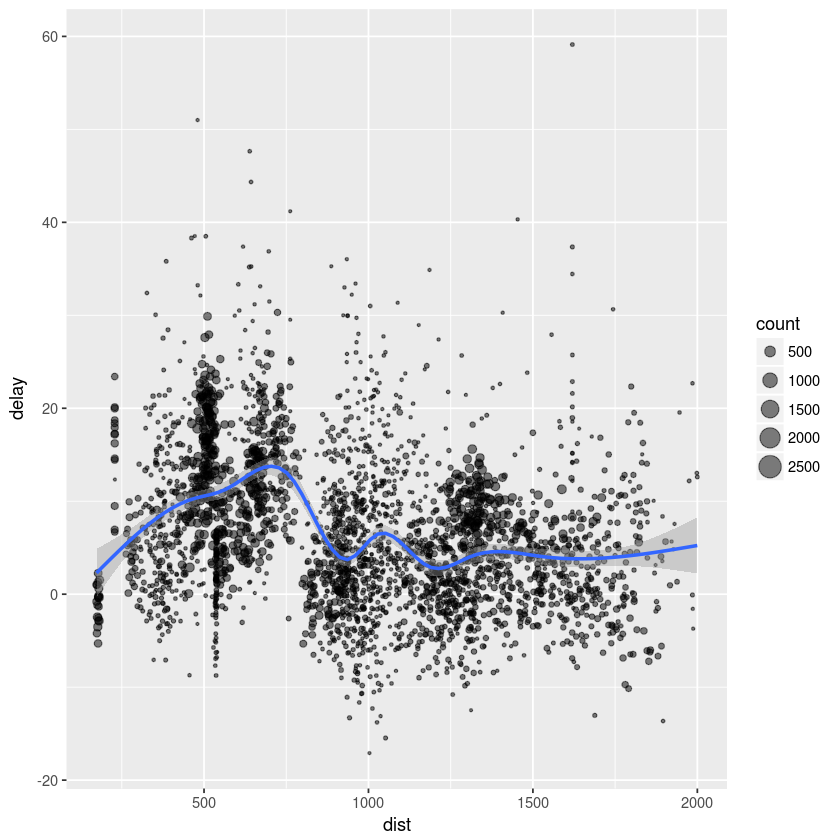

In [24]:
library(ggmap)
library(maptools)
library(maps)
library(ggplot2)
by_tailnum <- group_by(flights, tailnum)
delay <- summarise(by_tailnum,
  count = n(),
  dist = mean(distance, na.rm = TRUE),
  delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dist < 2000)

# Interestingly, the average delay is only slightly related to the
# average distance flown by a plane.
ggplot(delay, aes(dist, delay)) +
  geom_point(aes(size = count), alpha = 1/2) +
  geom_smooth() +
  scale_size_area()

Fetching all the records using collect() function

In [25]:
f1<-select(flights,arr_delay)
collect(f1)
class(f1)

arr_delay
11
20
33
-18
-25
12
19
-14
-8
8


[1] "tbl_df"     "tbl"        "data.frame"

Use of translate_sql() to find out sql equivalent of R variables

In [26]:
translate_sql(x)

<SQL> "x"

Translation of exponents in SQL

In [27]:
translate_sql(x ^ 2 < 10)

<SQL> POWER("x", 2.0) < 10.0